In [1]:
# 1번의 기초적인 신경망을 통해서 사진 분류기를 학습함
# 데이터집합은 CIFAR-10이며, 아래의 예와 같이 10가지의 3 (R, G, B)채널의 32*32 크기의 사진으로 구성됨

# CIFAR-10과 같이 많이 사용되는 데이터집합은 torchvision 패키지에서 제공함
# 분류기 학습은 다음과 같은 과정을 가짐
# 1. 정규화된 CIFAR-10 훈련집합과 테스트집합을 torchvision을 이용하여 적재함
# 2. 컨볼루션 신경망을 정의함
# 3. 손실함수 정의
# 4. 훈련집합을 이용하여 신경망을 학습시킴
# 5. 테스트집합을 이용하여 신경망 성능 확인

In [2]:
### 1. 정규화된 CIFAR-10 훈련집합과 테스트집합을 torchvision을 이용하여 적재함
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# (1) 화면 출력 확인

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
# 훈련집합의 일부 사진들 확인
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

horse  bird  frog truck


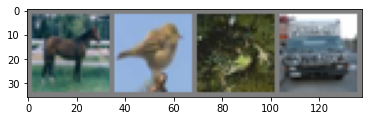

In [7]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[ j]] for j in range(4)))
# (2) 화면 출력 확인

In [8]:
### 2. 컨볼루션 신경망을 정의함
# 3채널 32*32 크기의 사진을 입력받고, 신경망을 통과해 10 부류를 수행
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
  def __init__(self ):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    
    return x

net = Net()

In [10]:
### 3. 손실함수 정의, 교차 엔트로피와 SGD+momentum
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
### 4. 훈련집합을 이용하여 신경망을 학습시킴
for epoch in range(2):# loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # print statistics
    running_loss += loss.item()
    if i % 1000 == 999:  # print every 1000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
      running_loss = 0.0

print('Finished Training')
# (3) 화면 출력 확인 및 학습이 되고 있는지 서술

[1,  1000] loss: 2.291
[1,  2000] loss: 2.125
[1,  3000] loss: 1.891
[1,  4000] loss: 1.767
[1,  5000] loss: 1.674
[1,  6000] loss: 1.594
[1,  7000] loss: 1.552
[1,  8000] loss: 1.558
[1,  9000] loss: 1.534
[1, 10000] loss: 1.482
[1, 11000] loss: 1.436
[1, 12000] loss: 1.407
[2,  1000] loss: 1.390
[2,  2000] loss: 1.378
[2,  3000] loss: 1.368
[2,  4000] loss: 1.349
[2,  5000] loss: 1.340
[2,  6000] loss: 1.319
[2,  7000] loss: 1.302
[2,  8000] loss: 1.297
[2,  9000] loss: 1.298
[2, 10000] loss: 1.270
[2, 11000] loss: 1.261
[2, 12000] loss: 1.242
Finished Training


# (3) 화면 출력 확인 및 학습이 되고 있는지 서술
- Epoch가 진행될 수록 loss가 줄어들고 있으므로, 학습이 잘 진행되고 있습니다.


GroundTruth:  plane plane plane  frog


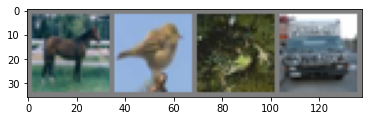

In [12]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
# (4) 화면 출력 확인


In [13]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[ j]] for j in range(4)))
# (5) 화면 출력 확인

Predicted:   deer  bird  frog truck


In [14]:
# performance on the whole test dataset
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
# (6) 화면 출력 확인 및 일반화 성능 서술

Accuracy of the network on the 10000 test images: 54 %


# 일반화 성능 서술
10000개의 test image를 학습한 결과 54%의 정확도로 일반화가 가능한 걸 알 수 있습니다.

In [15]:
# performance on each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
# (7) 화면 출력 확인 및 부류별 분류기의 성능 서술

Accuracy of plane : 48 %
Accuracy of   car : 52 %
Accuracy of  bird : 18 %
Accuracy of   cat : 32 %
Accuracy of  deer : 70 %
Accuracy of   dog : 50 %
Accuracy of  frog : 64 %
Accuracy of horse : 58 %
Accuracy of  ship : 66 %
Accuracy of truck : 80 %


# (7) 화면 출력 확인 및 부류별 분류기의 성능 서술

```
Accuracy of plane : 48 %
Accuracy of   car : 52 %
Accuracy of  bird : 18 %
Accuracy of   cat : 32 %
Accuracy of  deer : 70 %
Accuracy of   dog : 50 %
Accuracy of  frog : 64 %
Accuracy of horse : 58 %
Accuracy of  ship : 66 %
Accuracy of truck : 80 %
```
- 부류별 분류기의 성능은 위와 같은 결과를 보여줍니다..
- 반복이 2번 밖에 되지 않아서 Accuracy가 굉장히 낮은 것을 알 수 있습니다.
